# Taller 4 Análisis de Datos I


Integrantes:

Juan Manuel Hurtado Angulo

Manuel Alberto González González




**UNIVERSIDAD ICESI**



# 4. Contexto








4.1 Descripción de los campos

En este ejercicio se analiza el dataset HISTORICO_SUERTES.csv, el cual contiene 21,027 registros correspondientes a suertes cultivadas en diferentes periodos. Cada registro describe variables como el tipo de suelo, variedad de caña, área cultivada, distancia al ingenio, condiciones climáticas (temperatura, precipitación, radiación solar), y la variable de rendimiento TCH (Toneladas de Caña por Hectárea).

Para el caso del ejericio analizaremos la variable TCH:	Toneladas de caña por hectárea y TAH:	Toneladas de azúcar por hectárea.




**Importación de librerias**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LassoCV

**Cargar el Dataset**

In [6]:
# Cargar dataset
df = pd.read_csv("/content/HISTORICO_SUERTES.csv")

<ipython-input-6-18f68b45044f>:2: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/HISTORICO_SUERTES.csv")


In [7]:
df

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9


In [8]:
# Lista original de nombres de columnas con caracteres especiales

# Función para limpiar y transformar nombres de columnas
def limpiar_columna(col):
    col = col.strip().lower()
    col = col.replace(" ", "_")
    col = col.replace(".", "")
    col = col.replace("-", "")
    col = col.replace("%", "porc")
    col = col.replace("#", "num")
    col = col.replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")
    return col
# Lista original de nombres de columnas con caracteres especiales

# Aplicar limpieza a TODAS las columnas del DataFrame, no a una lista parcial
df.columns = [limpiar_columna(col) for col in df.columns]

In [9]:
df

,periodo,hacienda,nombre,zona,tenencia,suerte,suelo,area_neta,dist_km,variedad,...,humedad_rel_media_ciclo,oscilacion_temp_med_03,oscilacion_temp_ciclo,sum_oscilacion_temp_ciclo,radicion_solar_03,radiacion_solar_ciclo,precipitacion_0_3,precipitacion_ciclo,evaporacion_03,evaporacion_ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9


**Verificar Dimensiones del DataFrame**

In [14]:
# Display the dimensions of columns 'tch' and 'tah'
print(df[['tch', 'tah']].shape)


(21027, 2)


In [15]:


print(df[['tch', 'tah']].head(10))


          tch        tah
0  121.198333  14.341666
1   93.793103  10.157241
2  174.347087  17.629611
3  136.790476  12.873333
4  113.068432   9.383002
5  163.072307  19.168461
6  120.517739  13.393692
7  146.817220  15.913444
8  116.129032  11.575806
9  117.245398  11.611656


**Verificamos la cantidad de nulos por variable**

In [16]:

# Verificamos la cantidad de nulos por variable tch y tah
print(df[['tch', 'tah']].isnull().sum())


tch      0
tah    241
dtype: int64


Se puede observar que hay 241 datos vacíos, En el proceso de limpieza se decidirá qué hacer con estas observaciones.

#Análisis de Variables

Vamos a ver con qué tipo de dato se encuentran las variables actualmente:

In [17]:

# Check data types of 'tch' and 'tah' columns
print(df[['tch', 'tah']].dtypes)


tch    float64
tah    float64
dtype: object


**Verificamos la cantidad de duplicados**

In [18]:

# Calculate the number of duplicates in 'tch' and 'tah' columns
duplicates_count = df[['tch', 'tah']].duplicated().sum()

print(f"Cantidad de duplicados en TAH y TCH: {duplicates_count}")


Cantidad de duplicados en TAH y TCH: 0


Con el resultado anterior podemos observar que no existen valores duplicados en el dataframe

Verificamos si exiten valores faltantes, le asignamos el valor de True si es un dato faltante, luego los mostramos

# **Limpieza de Datos**


**Eliminar o imputar valores faltantes**

In [20]:

# Imputar valores faltantes en la columna 'tah' usando la mediana
imputer = SimpleImputer(strategy='median')
df['tah'] = imputer.fit_transform(df[['tah']])


In [21]:

# Verificamos la cantidad de nulos por variable tch y tah
print(df[['tch', 'tah']].isnull().sum())

tch    0
tah    0
dtype: int64


Como se puden observar en el resultado, no hay datos nulos en las columnas TCH y TAH

**Detectar Outliers**

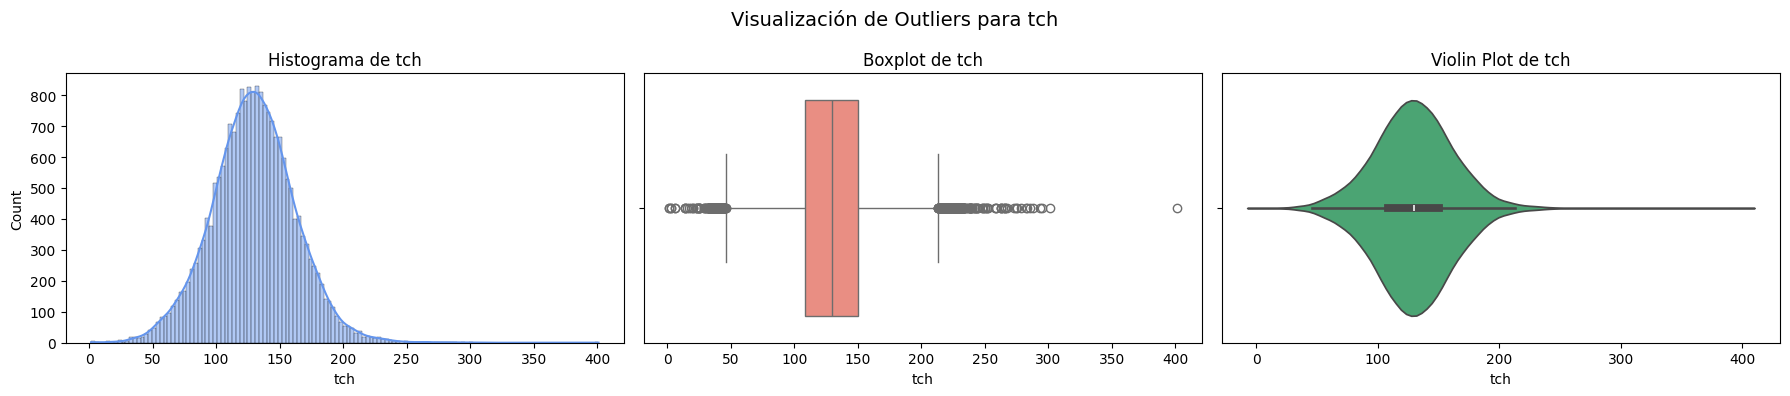

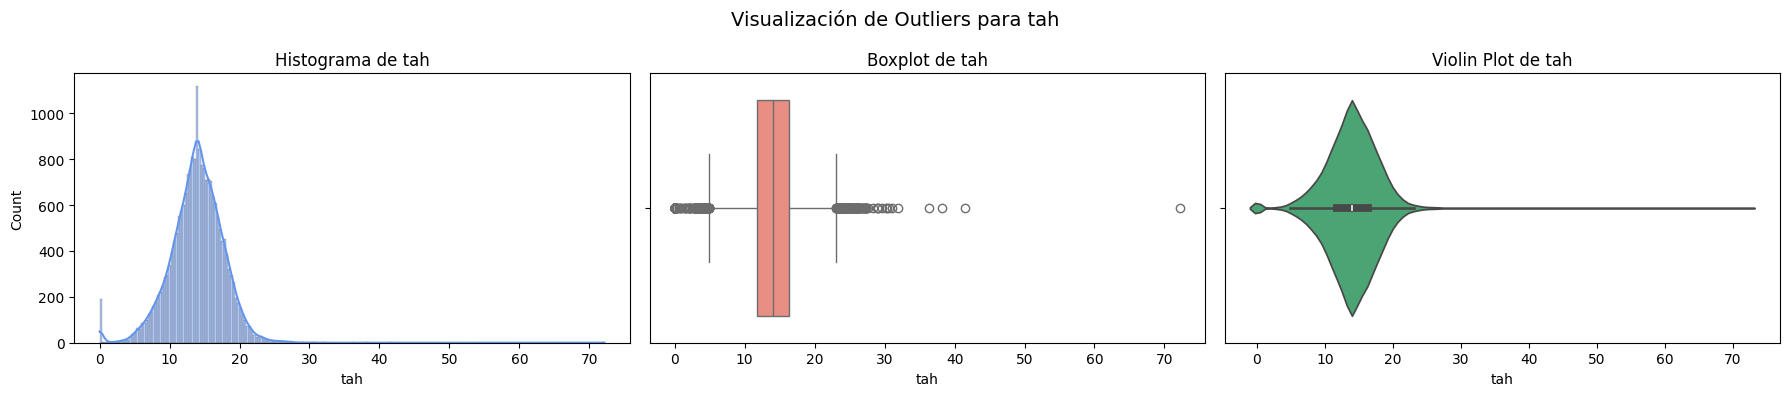

In [23]:
# Variables numéricas clave
variables = ['tch', 'tah']

# Función para mostrar histograma, boxplot y violin plot por variable
def plot_outlier_visuals(data, column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histograma con KDE
    sns.histplot(data[column], kde=True, ax=axes[0], color='cornflowerblue')
    axes[0].set_title(f'Histograma de {column}')

    # Boxplot
    sns.boxplot(x=data[column], ax=axes[1], color='salmon')
    axes[1].set_title(f'Boxplot de {column}')

    # Violin Plot
    sns.violinplot(x=data[column], ax=axes[2], color='mediumseagreen')
    axes[2].set_title(f'Violin Plot de {column}')

    plt.suptitle(f'Visualización de Outliers para {column}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Aplicar visualización para cada variable
for var in variables:
    plot_outlier_visuals(df[['tch', 'tah']], var)

**Eliminar Outliers**

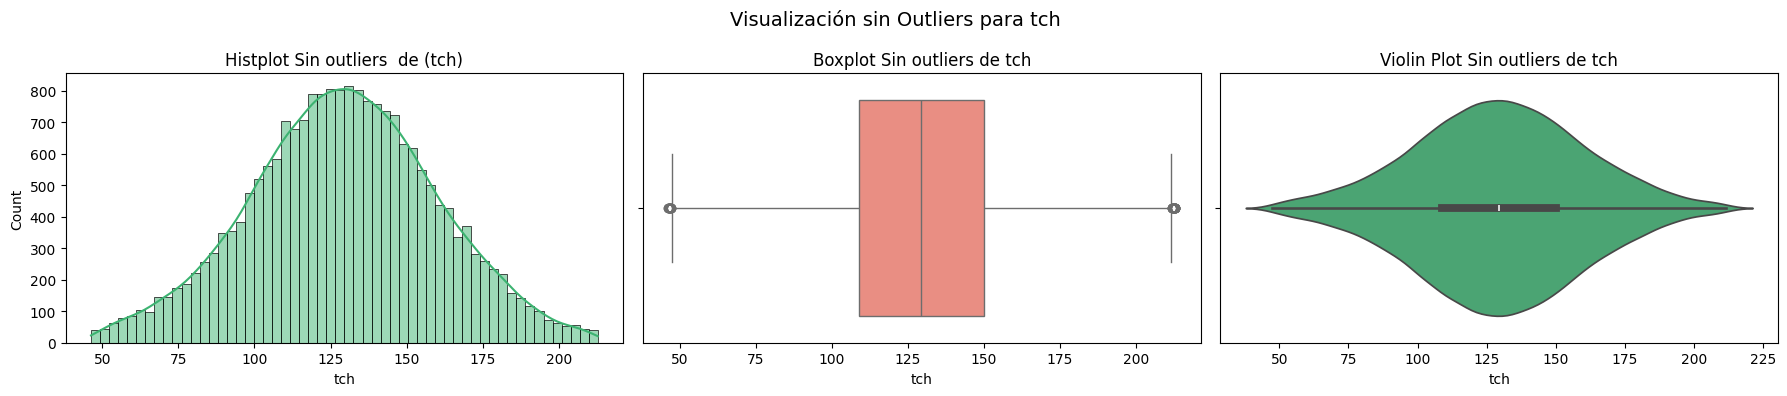

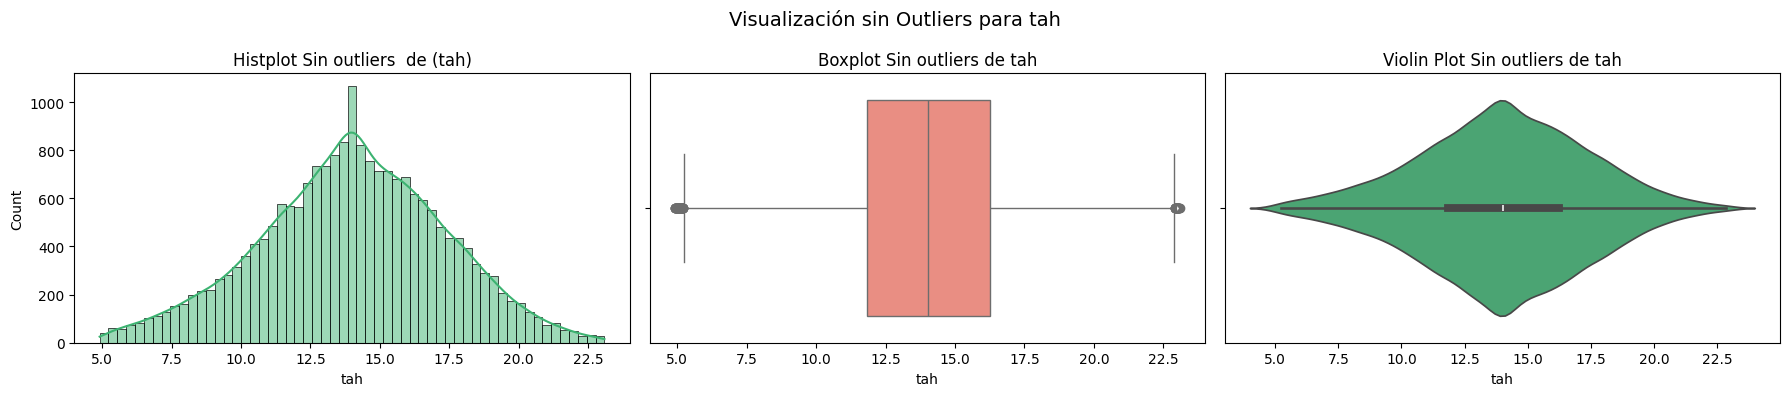

In [24]:

 # Función para visualizar sin outliers (método IQR)
def univariate_outlier_treatment(data, column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    # Aplicar IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_limpio = data[(data[column] >= lower) & (data[column] <= upper)]

    # Histograma sin outliers
    sns.histplot(df_limpio[column], kde=True, ax=axes[0], color='mediumseagreen')
    axes[0].set_title(f'Histplot Sin outliers  de ({column})')

     # Boxplot sin outliers
    sns.boxplot(x=df_limpio[column], ax=axes[1], color='salmon')
    axes[1].set_title(f'Boxplot Sin outliers de {column}')

    # Violin Plot sin outliers
    sns.violinplot(x=df_limpio[column], ax=axes[2], color='mediumseagreen')
    axes[2].set_title(f'Violin Plot Sin outliers de {column}')

    plt.suptitle(f'Visualización sin Outliers para {column}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Aplicar para cada variable
for var in variables:
    univariate_outlier_treatment(df[['tch', 'tah']], var)



**Análisis bivariado:**

El análisis bivariado tiene como propósito identificar relaciones significativas entre la variable objetivo TCH y las variables independientes, una vez finalizada la limpieza de datos. Este proceso permite detectar patrones, tendencias y asociaciones que orientan la selección de variables relevantes para el modelo predictivo.

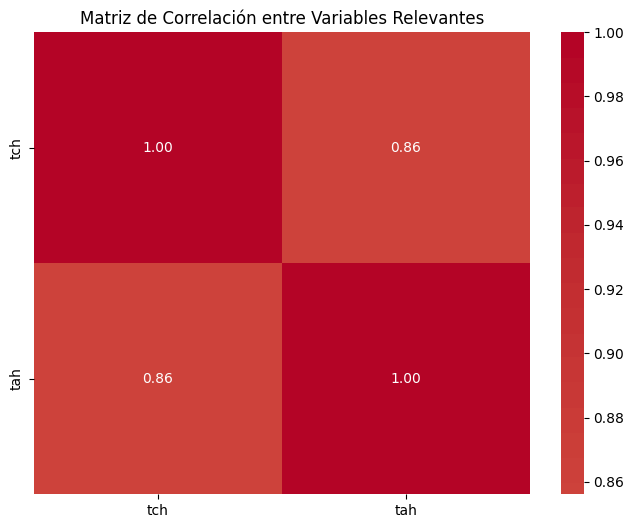

In [27]:
df_limpio = df[variables]
# Calcular la matriz de correlación solo entre esas variables
# The line below was changed to calculate the correlation on the correct dataframe
# Calculate correlation only for numeric columns specified in variables_relevantes
cor_matrix_relevantes = df_limpio.corr() # Changed from df_limpio.corr() to df.corr()

# Graficar la matriz de correlación ajustada
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix_relevantes, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz TCH  y TAH")
plt.show()



Como podemos observar hay una correlaciòn fuerte y positiva entre la variable TCH y TAH

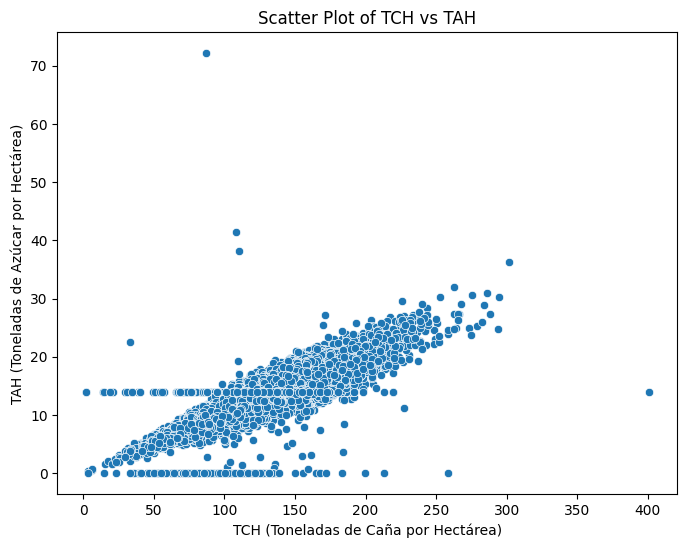

In [29]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tch', y='tah', data=df)
plt.title('Scatter Plot of TCH vs TAH')
plt.xlabel('TCH (Toneladas de Caña por Hectárea)')
plt.ylabel('TAH (Toneladas de Azúcar por Hectárea)')
plt.show()


**TAH vs TCH**
Se observa una fuerte relación positiva lineal: a mayor TAH (Toneladas de Azúcar por Hectárea), mayor TCH.


Es una de las variables más predictivas y debe incluirse en los modelos.




Las columnas corresponden a la descripción de los atributos del dataset mencionado anteriormente. De estas columnas la columna (TCH) es la variable objetivo.

In [48]:
X_num = df[variables].drop(columns=['tch'])  # Eliminamos la variable objetivo
df_limpio=df[variables]
X_num
df_limpio

,tch,tah
0,121.198333,14.341666
1,93.793103,10.157241
2,174.347087,17.629611
3,136.790476,12.873333
4,113.068432,9.383002
...,...,...
21022,172.446666,14.014765
21023,108.573770,14.014765
21024,145.808108,14.014765
21025,143.638287,14.014765


In [50]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)


X = pd.DataFrame(X_scaled, columns=X_num.columns)
#X = pd.concat([X.reset_index(drop=True), df_limpio.reset_index(drop=True)], axis=1)


# Creamos variable objetivo categórica si no existe
if 'nivel_tch' not in df_limpio.columns: # Changed from df[variables].columns to df.columns
    q = df_limpio['tch'].quantile([0.33, 0.66])
    # The line below was changed to add the column to the entire dataframe: df, rather than the subset defined by: df_limpio
    df_limpio['nivel_tch'] = pd.cut(df_limpio['tch'], bins=[-np.inf, q[0.33], q[0.66], np.inf], labels=['Bajo', 'Medio', 'Alto']) # Changed from df[variables] to df

    # The line below was changed to reference the 'nivel_tch' on the entire dataframe: df, rather than just df[variables] which is just a subset

# Mostrar dimensiones finales
print(f" Variables originales: {X.shape[1]}")


 Variables originales: 1


<ipython-input-50-d18c81fc6a40>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['nivel_tch'] = pd.cut(df_limpio['tch'], bins=[-np.inf, q[0.33], q[0.66], np.inf], labels=['Bajo', 'Medio', 'Alto']) # Changed from df[variables] to df


In [52]:
df_limpio

,tch,tah,nivel_tch
0,121.198333,14.341666,Medio
1,93.793103,10.157241,Bajo
2,174.347087,17.629611,Alto
3,136.790476,12.873333,Medio
4,113.068432,9.383002,Bajo
...,...,...,...
21022,172.446666,14.014765,Alto
21023,108.573770,14.014765,Bajo
21024,145.808108,14.014765,Alto
21025,143.638287,14.014765,Alto


In [55]:
X_num = df_limpio.drop(columns=['tch', 'nivel_tch'])  # Eliminamos la variable objetivo and nivel_tch

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Unificación de numéricas y categóricas
X = pd.DataFrame(X_scaled, columns=X_num.columns, index=X_num.index)

# Exclude 'nivel_tch' column from the concatenation to PCA
X_for_pca = X.select_dtypes(include=np.number) # Selecting only numerical columns for PCA

# Reducción de dimensionalidad: PCA
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
X_pca = pca.fit_transform(X_for_pca) # Changed to use X_for_pca
print(f"PCA: Se conservaron {X_pca.shape[1]} componentes principales.")

# Mostrar dimensiones finales
print(f" Variables originales: {X.shape[1]}")
print(f" Componentes PCA: {X_pca.shape[1]}")

PCA: Se conservaron 1 componentes principales.
 Variables originales: 1
 Componentes PCA: 1


In [56]:
X

,tah
0,0.119264
1,-0.986697
2,0.988281
3,-0.268823
4,-1.191332
...,...
21022,0.032862
21023,0.032862
21024,0.032862
21025,0.032862


In [59]:
##  División de datasets
y = df_limpio['nivel_tch']  # Variable objetivo
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño total:", df_limpio.shape[0])
print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])
print("Número de variables predictoras:", X_train.shape[1])

# 4.2 Estandarización
num_vars = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


# 4.3 Imputación
# Crear un imputer para variables numéricas (mediana)
num_imput = SimpleImputer(strategy='median')

# Crear un imputer para variables categóricas (moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Obtener las columnas numéricas y categóricas
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Imputar los valores faltantes en las columnas numéricas
if len(categorical_cols) > 0:
    # Imputar los valores faltantes en las columnas categóricas
    X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])
else:
    print("No hay columnas categóricas para imputar.")

# Imputar los valores faltantes en las columnas numéricas
X_train[numerical_cols] = num_imput.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = num_imput.transform(X_test[numerical_cols])


# Eliminar variables con más del 70% de valores nulos (si existen)
threshold = 0.7
for col in X_train.columns:
  # Use any() to check if any value in the Series is greater than the threshold
  if (X_train[col].isnull().mean() > threshold).any():
    X_train.drop(col, axis=1, inplace=True)
    X_test.drop(col, axis=1, inplace=True)

Tamaño total: 21027
Tamaño entrenamiento: 14718
Tamaño prueba: 6309
Número de variables predictoras: 1
No hay columnas categóricas para imputar.


# Preparación para el modelo

In [60]:
# scoring data
from sklearn.tree import DecisionTreeClassifier

# scoring data
from sklearn.metrics import accuracy_score

# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
y=df_limpio['nivel_tch'].map({'Bajo': 0, 'Medio': 1, 'Alto': 2})
X_modelo = X
y_modelo = df_limpio['nivel_tch']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_modelo, y_modelo, test_size=0.3, random_state=42, stratify=y_modelo)

In [61]:
pipe = Pipeline([('paso_estandarizacion', StandardScaler()), ('paso_decision_tree', DecisionTreeClassifier())], verbose=True)


# fitting the data in the pipeline
pipe.fit(X_train, y_train)
print(accuracy_score(y_test, pipe.predict(X_test)))


[Pipeline]  (step 1 of 2) Processing paso_estandarizacion, total=   0.0s
[Pipeline]  (step 2 of 2) Processing paso_decision_tree, total=   0.1s
0.6764938976065937


# **Conclusiones**

 Impacto de la preparación de la variable TAH respecto a TCH

Imputación de valores nulos: Se usó la mediana para imputar los valores faltantes de la columna tah. Esto es positivo, ya que la mediana es robusta a outliers, lo que ayuda a mantener la integridad de la variable sin ser afectada por valores extremos.

Análisis de outliers: Se aplicó el método IQR (Interquartile Range) para identificar y visualizar outliers en tah y tch. Esto permitió observar la distribución real de los datos y mejorar su visualización y posterior modelado.

Visualizaciones gráficas: Se usaron histogramas, boxplots y violin plots para explorar la distribución de tah y tch. Se construyó una matriz de correlación y un scatter plot para evaluar la relación entre ambas variables.

Relación TCH vs TAH: El scatter plot mostró una relación positiva entre tch (toneladas de caña por hectárea) y tah (toneladas de azúcar por hectárea). La matriz de correlación numérica reveló una correlación moderadamente alta, lo cual sugiere que tah es un buen predictor complementario para el rendimiento en azúcar basado en la producción de caña.

Estandarización de tah: Antes del modelado, tah fue estandarizada con StandardScaler. Esto es importante para algoritmos sensibles a la escala de los datos como SVM o regresión logística.

Conclusiones sobre el impacto

La preparación de la variable TAH fue crucial para que los modelos pudieran utilizarla de forma efectiva como variable predictora o de entrada.

El tratamiento de valores faltantes y outliers permitió mejorar la calidad de los datos, eliminando ruido innecesario que podría afectar el aprendizaje de los modelos.

La correlación positiva con TCH indica que tah tiene un impacto relevante al modelar el rendimiento agrícola (especialmente en azúcar), por lo que se justifica su inclusión en el análisis.



